# Introduction
Anime is a type of animation originating from Japan, and is a part of the country's signature "otaku" culture that consists of manga and anime fanatics. Some well-known classics include "One Piece", "Pokemon", "Detective Conan", and works by Studio Ghibli such as "Spirited Away". Since its emergence at the start of the 20th century, anime has significantly impacted Japan's popular culture and economy. Increasingly, the influence of anime is not limited to just Japan as anime conventions are held around the world. Anime Expo, held in Los Angeles, California, is the largest anime convention overseas and boasts a yearly attendance of 107,658 people (https://largest.org/entertainment/anime-conventions-usa/). 

In light of anime's broad audience and its economic and cultural impact, the goal of this analysis is to dissect the anime consumer base. Specifically, we will look into the consumer demographics and various characteristics of anime that can influence its success, such as genres and duration of the anime. 

We found that overall, there is a distinction between the genres preference between males and females and that the genres studios are targetting are not in line with what many viewers prefer. We also found that duration of anime seasons seemed to have no relationship with people's desire and satisfaction for an anime. Through these analyses, anime studios can develop more effective approaches to maximizing rating and viewership, such as focusing more on certain genres and plots. The anime that these studios subsequently produce may then bring about the next wave of pop cultural notes.
____

# Data Description

### What are the observations (rows) and the attributes (columns)?
**1. anime_data:** 

Observations: anime series

Attributes: 
- **uid**: identifier for each anime set by MAL.
- **title**: title of the anime series in Japanese/English as set by MAL.
- **genre**: genre categories the anime falls in (multiple).
- **aired**: the start and end date of airing of the anime. "?" end dates means it is ongoing.
- **episodes**: number of episodes of the anime.
- **members**: number of members who've added the anime to their list: All Anime, Currently Watching, Completed, On Hold, Dropped, or Plan to Watch. The higher the number of members, the higher the popularity (lower numerical value).
- **popularity**: A 1 to maximum number of animes ranking system based on the number of members that have it on its list in comparison to the other animes on MAL.
- **rating**: aggregate rating from 0.00 to 10.00 by the MAL community.
- **ranked**: A 1 to maximum number of animes ranking system based on its rating to the other animes on MAL.
- **aired_year**: the year of its start aired date.

**2. anime_epdata:** 

anime_epdata has the same column attributes as anime_data, without aired_year. It has less observations because animes with missing episodes were removed.



**3. users:**

Observations: singular MAL user (public profile)

Attributes: 
- **profile**: username of MAL user (set by the user)
- **gender**: gender (male, female, non-binary) of the MAL user (set by the user) 
- **favorites**: List of animes the user put into their Anime List - favorites
- **birth_year**: birth year of the user (set by the user)

### Who created the datasets?
All datasets were obtained from Kaggle. These datasets are collected by Kaggle users from by web-crawling MyAnimeList (MAL) https://myanimelist.net/ and the unofficial Jikan API. 

### Why were the datasets created? 
Users on Kaggle created these datasets for personal/public interests and are not funded. 

### What processes might have influenced what data was observed and recorded and what was not? 
The Kaggle user had created the dataset to provide a general overview of the information available on MyAnimeList, so a lot of the most important information (ex: anime title, id, synopsis, genre, number of episodes, air date) were recorded. In a possible attempt to make the dataset as concise as possible, other less important information (ex: recommendations for similar anime titles, videos, news, forum, featured, pictures) were excluded. 

### What preprocessing was done, and how did the data come to be in the form that you are using? 
After obtaining them from Kaggle, we imported and cleaned the dataset to create the modified versions ("anime_data.csv", "anime_epdata.csv", "users.csv"). In preprocessing, we renamed columns, deleted missing information, and removed columns that we would not be using. Specific details on the cleaning process can be found in the Appendix.

### Where can your raw source data be found, if applicable?
https://www.kaggle.com/marlesson/myanimelist-dataset-animes-profiles-reviews?select=reviews.csv

- animes_marlesson_may20.csv
- profiles_marlesson_may20.csv
___

# Pre-registration Statement

#### Analysis 1: The relationship between gender and genre preferences

Is it true that males tend to gravitate towards different genres than females do? If so, understanding the difference in male v. female preferences will be critical in helping anime studios cater to their intended audience, or attempt to create an anime that can appeal to both genders. Our first analysis will explore whether this gendered difference does in fact exist in anime genre preferences.

From the user.csv, we can get information from around 34,550 users out of 81,000 users about their gender (binary M/F) and favorite animes. In the anime_marlesson_jan20.csv, we have information about the multiple genres each anime is tagged by. We would use get_dummies on the gender, and create separate dataframes for males and females. Then, within the dataframes, we would go through each user and look at the genre tags associated with each of the anime in their favorites list. This would allow us to see a distribution of the frequency in which a particular genre appears for male v. female favorites. We would expect that males are more likely to watch genres such as action and adventure than females, and that females are more likely to watch genres such as romance.


#### Analysis 2: The relationship between rank and number of episodes

Most animes are around 12, 24, or 25 episodes long. Does number of episodes impact the satisfaction people have (the score they rate) for an anime?  

From anime_marlesson_jan20.csv, we can get the information on an anime's rank and the number of episodes that it has. We will perform a linear regression analysis to find the correlation between the number of episodes and the anime's resulting rank. While we expect that animes that are ranked higher may get more episodes, it is also possible that the anime gets more episodes because people ranked it highly, or because it was "mainstream." To better understand the assumed positive correlation between rank and number of episodes, we could then perform a multivariable regression analysis, with rank as the measured variable, with factors such as popularity (which is a measure of how "mainstream" it is), number of members, and it's score rated by MAL members.

*Note*: Rank and population are ordinal data where they represent a categorical scale where there is no linear relationship in the difference between each value. They are also inversed in that the lower the rank and popularity, for example a ranking or popularity of 1, the better the anime. 
___

# Data Analysis

___

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


#Style
plt.style.use("seaborn")

In [2]:
#importing datasets
anime_data = pd.read_csv("anime_data.csv")
anime_epdata = pd.read_csv("anime_epdata.csv")
users = pd.read_csv("users.csv")

## Part 1: User Demographics 

To start off our analysis, we will first look at the demographics of MyAnimeList's users. 
#### Gender Distribution

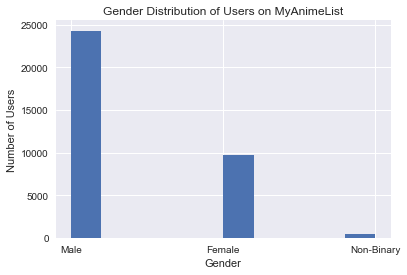

In [3]:
plt.hist(users['gender'])
plt.title("Gender Distribution of Users on MyAnimeList")
plt.xlabel("Gender") and plt.ylabel("Number of Users")
plt.show()

In [4]:
male_count = len(users[users['gender'] == 'Male'])
female_count = len(users[users['gender'] == "Female"])
non_bi_count = len(users[users['gender'] == "Non-Binary"])
print("Number of Male Users: {}".format(male_count))
print("Number of Female Users: {}".format(female_count))
print("Number of Non-Binary Users: {}".format(non_bi_count))

Number of Male Users: 24311
Number of Female Users: 9773
Number of Non-Binary Users: 466


From the above histogram and printed values, we can see that there are approximately 2.5 times more male users (24311 males) than female users (9773 females), and non-binary users make up the smallest portion of the user population (466 non-binary). 

#### Age Distribution of Users

In [5]:
#converting the year (str) to year (int)
for i in range(len(users['birth_year'])):
    users['birth_year'][i] = int(users['birth_year'][i])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


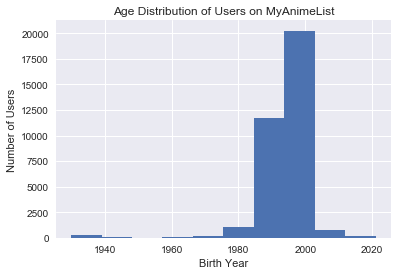

In [6]:
plt.hist(users['birth_year'].values)
plt.title("Age Distribution of Users on MyAnimeList")
plt.xlabel("Birth Year") and plt.ylabel("Number of Users")
plt.show()

In [7]:
print("Highest birth year: " + str(max(users['birth_year'])))
print("Lowest birth year: " + str(min(users['birth_year'])))
users['birth_year'].describe()

Highest birth year: 2021
Lowest birth year: 1930


count    34550.000000
mean      1993.880434
std          7.782989
min       1930.000000
25%       1991.000000
50%       1995.000000
75%       1998.000000
max       2021.000000
Name: birth_year, dtype: float64

The above histogram shows that the majority of users are clustered around birth years in the 1990s and 2000s, although there are noticeable outliers with some users noting birth years of below 1950 and above 2007. Since MyAnimeList's user policy states that users must be at least 13 years of age, we excluded users born after 2007  in our analysis below. We also ommitted users born before 1960 since those users are stark outliers. 

Below, we can more clearly see that the majority of users were born sometime between 1995 and early 2000s. 

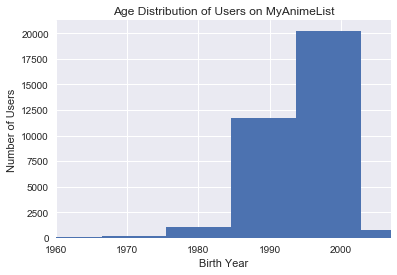

In [8]:
plt.hist(users['birth_year'].values)
plt.title("Age Distribution of Users on MyAnimeList")
plt.xlabel("Birth Year") and plt.ylabel("Number of Users")
plt.xlim([1960, 2007])
plt.show()

It is interesting to note that there are significantly fewer users on MyAnimeList born after the early 2000s (starting from around 2003) than there were users born before the early 2000s. This could be because users born after the early 2000s have not yet reached the age where they would use this site. Another explanation could be that MyAnimeList (launched in 2004) has decreased in popularity among the younger generation, perhaps due to the rise of competing platforms such as Crunchyroll (launched in 2006) which allows users to both review and watch anime on the platform, whereas MyAnimeList serves solely as a discussion forum. 

In [9]:
years = pd.Series(users['birth_year'].values)
year_counts = years.value_counts(ascending = False)
print(year_counts.head(1))

1997    3023
dtype: int64


The above analysis reveals that users born in 1997 make up a majority of the users on MyAnimeList, which indicates that a majority of users are 23 years old as of 2020. 

## Part 2: Genre Distribution

In [10]:
genre_dict = {}
for anime_tags in anime_data['genre']:
    anime_tags = ast.literal_eval(anime_tags)
    for genre in anime_tags:
        if genre not in genre_dict: 
            genre_dict[genre] = 1 
        else:
            genre_dict[genre] += 1 
print("Number of Unique Anime Genres: " + str(len(genre_dict)))

Number of Unique Anime Genres: 43


In [11]:
genres =[key for key in genre_dict]
genre_counts=[genre_dict[key] for key in genre_dict]

In [12]:
genre_distribution = pd.DataFrame(columns = ['genre', 'counts'])
genre_distribution['genre'] = genres
genre_distribution['counts'] = genre_counts
genre_distribution = genre_distribution.sort_values(by = 'counts', ascending = False)
genre_distribution = genre_distribution.reset_index(drop = True)
print("Below is a dataframe showcasing genres and their counts. Genres with highest counts are on the top.")
print("\nGenre with highest count: " + genre_distribution['genre'][0] + " at " + str(genre_distribution['counts'][0]) + " counts")
print("Genre with lowest count: " + genre_distribution['genre'][len(genre_distribution) - 1] + " at " + str(genre_distribution['counts'][len(genre_distribution) - 1]) + " counts")
genre_distribution.head(10)

Below is a dataframe showcasing genres and their counts. Genres with highest counts are on the top.

Genre with highest count: Comedy at 6461 counts
Genre with lowest count: Yaoi at 78 counts


,genre,counts
0,Comedy,6461
1,Action,4215
2,Fantasy,3466
3,Adventure,3143
4,Drama,3004
5,Sci-Fi,2832
6,Hentai,2574
7,Kids,2549
8,Shounen,2322
9,Romance,2152


The above analysis shows the number of anime that have a specific genre tag. Below is a visual representation of that information. 

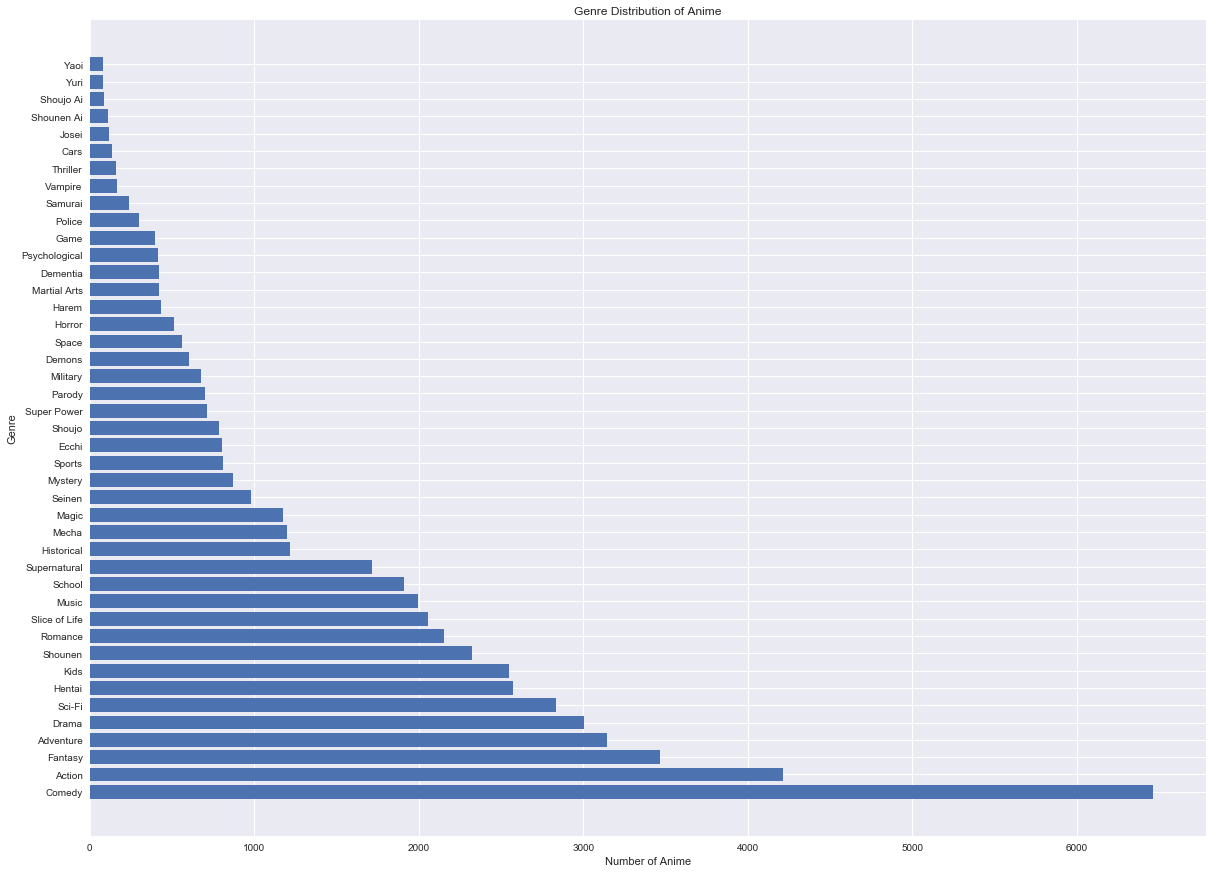

In [13]:
f, ax = plt.subplots(1, 1, figsize = (20, 15))
plt.barh(genre_distribution['genre'], genre_distribution['counts'])
plt.title("Genre Distribution of Anime")
plt.xlabel("Number of Anime") and plt.ylabel("Genre")
plt.show()

From the table and the graph, we can see that the top 5 most common genre tags are:
1. Comedy 
2. Action 
3. Fantasy 
4. Drama
5. Sci-fi 

This indicates that most anime series incorporate at least one (and likely more than one) of the above 5 themes. 

## Part 3: Analysis #1 - Gender Differences in Anime Genre Preference

In our analysis of the data, we hope to understand any potential differences in anime genre preferences according to a user's gender. To do so, we will look at the gender of the user and the genres of the anime that they have indicated are their favorites.

#### Extracting anime ID from the Users' String of Anime Favorites

The users dataframe presents the anime ID of user favorites in strings. Below, we extract the integer value of those IDs.

In [14]:
### function to extract uid from string
def extract_uid(string): 
    final_list = []
    if '[]' not in string: #ignoring empty lists
        fav_list = string.strip('[]')
        fav_list = fav_list.split("'")
        for anime_id in fav_list:
            if anime_id.isdigit():
                final_list.append(int(anime_id))
    return(final_list)

In [15]:
#Running function on all users' favorites 
fav_lists = []
for each in users['favorites']:
    fav_lists.append(extract_uid(each))
users['favorites'] = fav_lists

#### Creating Separate Dataframes for Males v. Females

In [16]:
#dummy for gender and genre 
genre_indicator = pd.get_dummies(genres)
gender_indicator = pd.get_dummies(users['gender']) #1 = female, 0 = male 
users['gender'] = gender_indicator

In [17]:
#separate dataframe for male v. female users
female_users = users[users.gender == 1 ]
male_users = users[users.gender == 0]

In [18]:
#pd Series containing all female favorites 
female_favs = []
for each in female_users['favorites']: 
    for anime in each:
        female_favs.append(anime)
female_favs = pd.Series(female_favs)

#pd Series containing the all male favorites 
male_favs = []
for each in male_users['favorites']: 
    for anime in each:
        male_favs.append(anime)
male_favs = pd.Series(male_favs)

#### Top 10 Male v. Female Favorites

In [19]:
ff_count = female_favs.value_counts().index.tolist()
print("Anime ID of Top 10 female favorites: ")
ff_count = ff_count[0:10]
print(ff_count[0:9])

top10_titles = []
f_top10_df = pd.DataFrame(columns = ['uid', 'title'])
f_top10_df['uid'] = ff_count
for anime_id in ff_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
f_top10_df['title'] = top10_titles
print("\nUID and Titles of Top 10 Female Favorites (Ordered from Most Counts to Least Counts):")
f_top10_df.head(10)





Anime ID of Top 10 female favorites: 
[5114, 1535, 853, 11061, 16498, 9756, 9253, 21, 1575]

UID and Titles of Top 10 Female Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,5114,Fullmetal Alchemist: Brotherhood
1,1535,Death Note
2,853,Ouran Koukou Host Club
3,11061,Hunter x Hunter (2011)
4,16498,Shingeki no Kyojin
5,9756,Mahou Shoujo Madoka★Magica
6,9253,Steins;Gate
7,21,One Piece
8,1575,Code Geass: Hangyaku no Lelouch
9,20583,Haikyuu!!


In [20]:
#top10 genres
ftop10_genres = []
for uid in f_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        ftop10_genres.append(anime_genres[i])
ftop10_genres = pd.Series(ftop10_genres) #all genre tags of male top10 
print("\nTop 10 Most observed genres of the top 10 female favorites: ")
fgenres = ftop10_genres.value_counts()[:10]
print(fgenres)


Top 10 Most observed genres of the top 10 female favorites: 
Drama          6
Shounen        6
Action         5
Fantasy        4
Comedy         4
Super Power    4
Military       3
Thriller       3
School         3
Adventure      3
dtype: int64


In [21]:
mf_count = male_favs.value_counts().index.tolist()
print("Anime ID of Top 10 male favorites: ")
mf_count = mf_count[0:10]
print(mf_count[0:9])

#titles of top10
top10_titles = []
m_top10_df = pd.DataFrame(columns = ['uid', 'title'])
m_top10_df['uid'] = mf_count
for anime_id in mf_count: 
    anime = anime_data[anime_data.uid == anime_id].drop_duplicates() 
    index = anime.index[0]
    title = anime_data['title'][index]
    top10_titles.append(title)
m_top10_df['title'] = top10_titles
print("\nUID and Titles of Top 10 Male Favorites (Ordered from Most Counts to Least Counts):")
m_top10_df.head(10)



Anime ID of Top 10 male favorites: 
[9253, 5114, 4181, 1535, 2001, 11061, 1575, 1, 30]

UID and Titles of Top 10 Male Favorites (Ordered from Most Counts to Least Counts):


,uid,title
0,9253,Steins;Gate
1,5114,Fullmetal Alchemist: Brotherhood
2,4181,Clannad: After Story
3,1535,Death Note
4,2001,Tengen Toppa Gurren Lagann
5,11061,Hunter x Hunter (2011)
6,1575,Code Geass: Hangyaku no Lelouch
7,1,Cowboy Bebop
8,30,Neon Genesis Evangelion
9,21,One Piece


In [22]:
#genre tags of top10
mtop10_genres = []
for uid in m_top10_df['uid']:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    index = anime.index[0]
    anime_genres = anime_data['genre'][index]
    anime_genres = anime_genres.strip("[]")
    anime_genres = anime_genres.split(", ")
    for i in range(len(anime_genres)):
        anime_genres[i] = anime_genres[i].strip("''")
        mtop10_genres.append(anime_genres[i])
mtop10_genres = pd.Series(mtop10_genres) #all genre tags of male top10 
print("\nTop 10 Most observed genres of the top 10 male favorites: ")
mgenres = mtop10_genres.value_counts()[:10]
print(mgenres)


Top 10 Most observed genres of the top 10 male favorites: 
Action         7
Drama          6
Adventure      5
Sci-Fi         5
Comedy         5
Shounen        4
Super Power    3
Fantasy        3
Mecha          3
Thriller       2
dtype: int64


From the above analyses, we see that females and males share some common anime favorites. Namely, many male and female users liked "Fullmetal Alchemist: Brotherhood", "One Piece", "Steins;Gate", and "Code Geass: Hangyaku no Lelouch." 

#### Genre Analysis of All User Favorites by Gender 

Next, we count the number of all animes favorites that have a specific genre tag for female users v. male users. 

#### Genre Tags of Top 10 Male v. Female Favorites

In [23]:
f_genre_dict = {}
dropped = 0 
for uid in female_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 0: 
        dropped += 1 
    else: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in f_genre_dict: 
                f_genre_dict[genre] += 1 
            else:
                f_genre_dict[genre] = 1 
#f_genre_dict

In the analysis above, there were cases where a specific anime UID was not found in the dataset, and thus we dropped those animes from our observation of genres. 

In [24]:
print("Number of anime not found (and thus dropped): " + str(dropped))

Number of anime not found (and thus dropped): 76


In [25]:
f_genres_df = pd.DataFrame(columns = ['genre', 'count_f'])

In [26]:
f_genres = [key for key in f_genre_dict] 
f_counts = [f_genre_dict[key] for key in f_genre_dict]

In [27]:
f_genres_df['genre'] = f_genres
f_genres_df['count_f'] = f_counts
f_genres_df = f_genres_df.sort_values(by = 'count_f', ascending = False)
print("Number of Times that Females Listed An Anime that Contained A Specific Genre: ")
f_genres_df.head(10)

Number of Times that Females Listed An Anime that Contained A Specific Genre: 


,genre,count_f
5,Comedy,25970
0,Action,22750
11,Drama,21714
3,Shounen,16619
18,Supernatural,15587
8,Romance,14090
2,Fantasy,13252
1,Adventure,13195
6,School,11071
17,Mystery,10586


Now, we do the same for males:

In [28]:
m_genre_dict = {}
dropped = 0 
for uid in male_favs:
    anime = anime_data[anime_data.uid == uid].drop_duplicates()
    if len(anime) == 0:
        dropped += 1 
    else: 
        genres = ast.literal_eval(anime['genre'][anime.index[0]])
        for genre in genres: 
            if genre in m_genre_dict: 
                m_genre_dict[genre] += 1 
            else:
                m_genre_dict[genre] = 1 
#m_genre_dict
print("Number of anime not found (and thus dropped): " + str(dropped))

Number of anime not found (and thus dropped): 279


In [29]:
m_genres_df = pd.DataFrame(columns = ['genre', 'count_m'])
m_genres = [key for key in m_genre_dict] 
m_counts = [m_genre_dict[key] for key in m_genre_dict]
m_genres_df['genre'] = m_genres
m_genres_df['count_m'] = m_counts
m_genres_df = m_genres_df.sort_values(by = 'count_m', ascending = False)
print("Number of Times that Males Listed An Anime that Contained A Specific Genre: ")
m_genres_df.head(10)

Number of Times that Males Listed An Anime that Contained A Specific Genre: 


,genre,count_m
3,Action,65172
5,Comedy,64048
1,Drama,59784
9,Shounen,41307
10,Supernatural,38318
4,Adventure,37125
16,Sci-Fi,36764
6,Romance,35872
2,Fantasy,33466
22,School,31475


To do a comparative analysis, we then attempted to merge the two dataframes to compare the numbers. Some analyses we looked at include the % of all genres that counts of a specific genre takes up for males v. females, as well as the ratio of male:female percentages for each genre.  

In [30]:
m_genres_df = m_genres_df.reset_index(drop = True)
f_genres_df = f_genres_df.reset_index(drop = True)

In [31]:
#merging the two dataframes
merged = pd.merge(m_genres_df, f_genres_df, on = "genre")

In [32]:
merged['% of all counts (m)'] = len(merged) * [0]
merged['% of all counts (f)'] = len(merged) * [0]
merged['ratio of m:f'] = len(merged) * [0]

In [33]:
m_ratios = []
m_total = sum(merged['count_m'])
f_ratios = []
f_total = sum(merged['count_f'])
mf_ratios = []

for i in range(len(merged)):
    m_ratio = merged['count_m'][i] / m_total * 100
    f_ratio = merged['count_f'][i] / f_total * 100
    mf_ratio = m_ratio / f_ratio
    m_ratios.append(round(m_ratio,4))
    f_ratios.append(round(f_ratio, 4))
    mf_ratios.append(mf_ratio)
    i += 1 
merged['% of all counts (m)'] = m_ratios
merged['% of all counts (f)'] = f_ratios
merged['ratio of m:f'] = mf_ratios
merged

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Action,65172,22750,9.4176,8.8186,1.067913
1,Comedy,64048,25970,9.2551,10.0668,0.919369
2,Drama,59784,21714,8.6390,8.4171,1.026364
3,Shounen,41307,16619,5.9690,6.4421,0.926563
4,Supernatural,38318,15587,5.5371,6.0420,0.916424
5,Adventure,37125,13195,5.3647,5.1148,1.048850
6,Sci-Fi,36764,8618,5.3125,3.3406,1.590276
7,Romance,35872,14090,5.1836,5.4617,0.949076
8,Fantasy,33466,13252,4.8359,5.1369,0.941410
9,School,31475,11071,4.5482,4.2915,1.059827


The dataframe above shows that there are indeed certain genres that are named as male favorites more often than female favorites, although the % differences tend to be within 1. Below is a graphic representation of genre counts of male vs. female favorites:

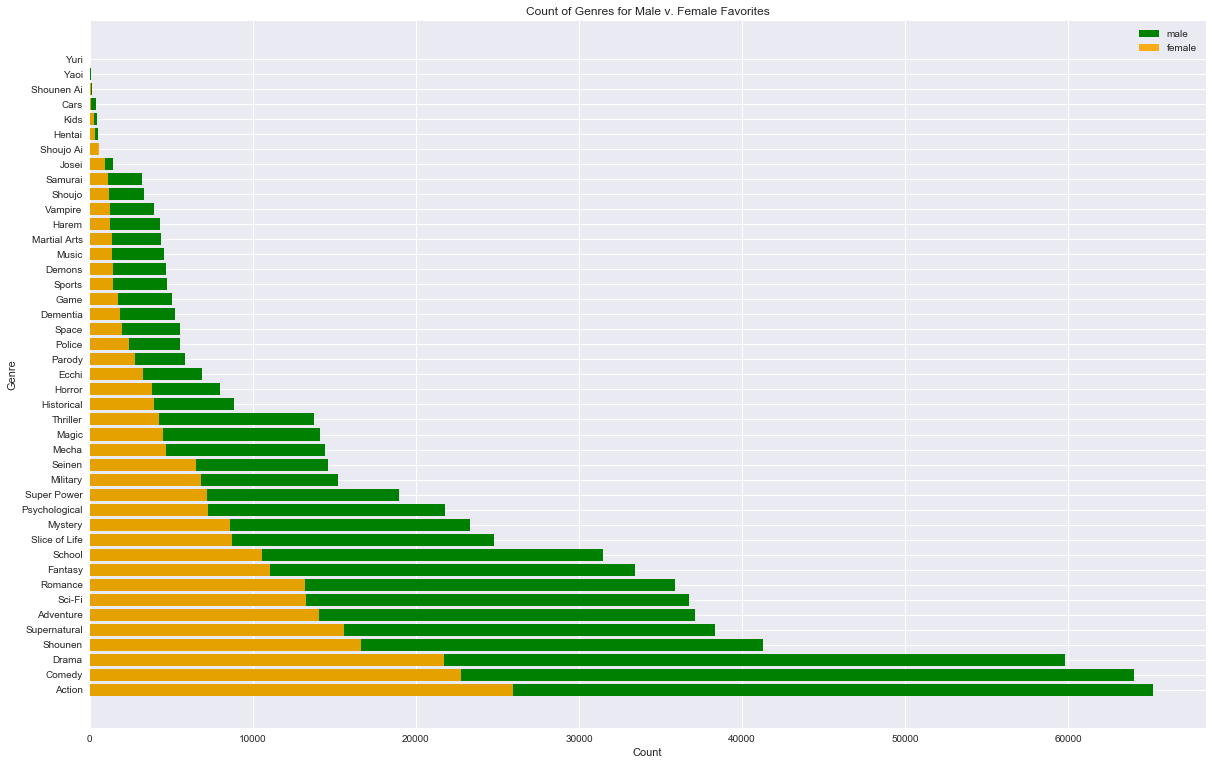

In [34]:
#graphic representation
f, ax = plt.subplots(1, 1, figsize = (20, 13))
plt.barh(merged['genre'], merged['count_m'], label = 'male', color = 'green')
plt.barh(merged['genre'], f_genres_df['count_f'], color = 'orange', label = 'female', alpha = 0.9)
plt.legend()
plt.title("Count of Genres for Male v. Female Favorites")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

In [35]:
#genre preferences compared
print("Genres where Females have Higher % of Counts than Males: ")
female_pref = merged[merged['% of all counts (f)'] > merged['% of all counts (m)']]
female_pref = female_pref.reset_index(drop = True)
female_pref.head(10)

Genres where Females have Higher % of Counts than Males: 


,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Comedy,64048,25970,9.2551,10.0668,0.919369
1,Shounen,41307,16619,5.9690,6.4421,0.926563
2,Supernatural,38318,15587,5.5371,6.0420,0.916424
3,Romance,35872,14090,5.1836,5.4617,0.949076
4,Fantasy,33466,13252,4.8359,5.1369,0.941410
5,Mystery,23328,10586,3.3710,4.1035,0.821489
6,Magic,14129,6531,2.0417,2.5316,0.806470
7,Historical,8868,4520,1.2815,1.7521,0.731381
8,Horror,7995,3270,1.1553,1.2676,0.911438
9,Sports,4710,2405,0.6806,0.9323,0.730066


The dataframe above shows all the genres that females tend to like more than males, and the top 10 most common are shown in the dataframe below: (comedy, shounen, supernatural, romance, fantasy, mystery, magic, historical, horror, and sports)

In [36]:
female_pref.head(10)

,genre,count_m,count_f,% of all counts (m),% of all counts (f),ratio of m:f
0,Comedy,64048,25970,9.2551,10.0668,0.919369
1,Shounen,41307,16619,5.9690,6.4421,0.926563
2,Supernatural,38318,15587,5.5371,6.0420,0.916424
3,Romance,35872,14090,5.1836,5.4617,0.949076
4,Fantasy,33466,13252,4.8359,5.1369,0.941410
5,Mystery,23328,10586,3.3710,4.1035,0.821489
6,Magic,14129,6531,2.0417,2.5316,0.806470
7,Historical,8868,4520,1.2815,1.7521,0.731381
8,Horror,7995,3270,1.1553,1.2676,0.911438
9,Sports,4710,2405,0.6806,0.9323,0.730066


## Part 4: Statistical summary and visualization of episodes and other variables

We want to observe the distribution of number of episodes of anime, as well as the relationship between number of episodes and score and number of members that have the anime on their list.

In [37]:
#creating variables for easy access
rank=anime_epdata["ranked"]
popularity=anime_epdata["popularity"]
score=anime_epdata["score"]
members=anime_epdata["members"]
episodes=anime_epdata["episodes"]

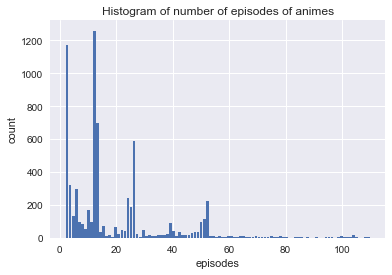

Statistical summary of anime episodes
count    6957.00
mean       18.79
std        18.27
min         2.00
25%         6.00
50%        12.00
75%        26.00
max       110.00
Name: episodes, dtype: float64

Mode episodes: 0    12.0
dtype: float64


In [38]:
#Plot histogram of distribution of episodes
plt.hist(episodes, bins=100, rwidth=0.9)
plt.title("Histogram of number of episodes of animes")
plt.xlabel('episodes')
plt.ylabel('count')
plt.show()

#statistical summaries
print("Statistical summary of anime episodes")
print(round(episodes.describe(),2))
print("\nMode episodes: {}".format(episodes.mode()))

From the histogram, we can tell that there are a lot of animes in the range of 0-20 episodes, especially around 10-15 episodes, with 12 episodes being the most common. This is probably due to the fact that animes are released by seasons, which lasts about 12-13 weeks given that each month has about 4-5 weeks. If one episode is released a week then it would make sense that the mode and median is 12.0.

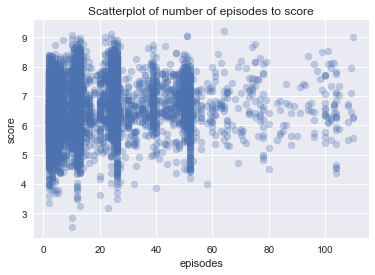

In [39]:
plt.scatter(episodes, score, alpha=0.3)
plt.title("Scatterplot of number of episodes to score")
plt.xlabel('episodes')
plt.ylabel('score')
plt.show()

From this we can see what we observed from the histogram, that there is a spike in number of animes with around 12, 24, and 48-50 episodes, with number of animes dwindling in higher episodes. The majority of the scores seem to be between 4-8.

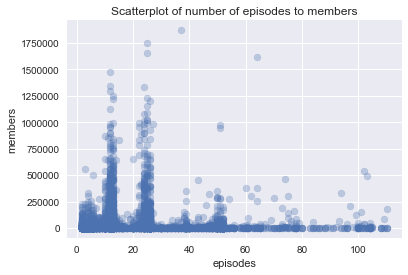

In [40]:
plt.scatter(episodes, members, alpha=0.3)
plt.title("Scatterplot of number of episodes to members")
plt.xlabel('episodes')
plt.ylabel('members')
plt.show()

We see a greater variety in the number of members around 12 and 24 episode animes, most likely because the majority of animes are within those durations. 

## Part 5: Analysis #2 -  Relationship between number of episodes and the variables, popularity and rank

First, we'll analyze  using a linear regression model to predict score, number of members, popularity, and rank based on the number of episodes. The metrics will be the outcomes and number of episodes is the predictor variable. 

#### Linear regression

We are most interested in the r-squared value and the spearman correlation which was chosen because rank and popularity are ordinal data and describe a monotonic relationship.

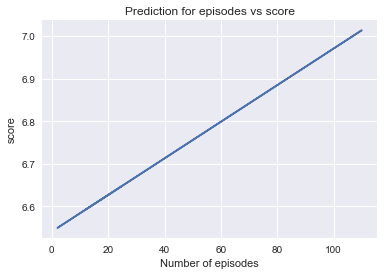

Predictor variable: score
r-squared value with score: 0.007682396268826164
regression slope with score: 0.004296752376994456

Spearman correlation: 0.163647551445702


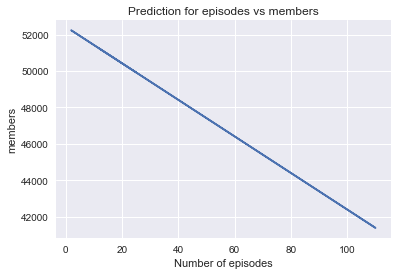

Predictor variable: members
r-squared value with members: 0.00020141986930344302
regression slope with members: -100.64662886260453

Spearman correlation: -0.0015401418117634287


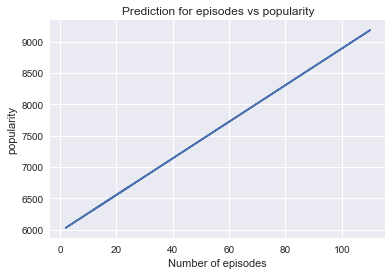

Predictor variable: popularity
r-squared value with popularity: 0.012861929510470382
regression slope with popularity: 29.1863802748941

Spearman correlation: 0.0013275743169721553


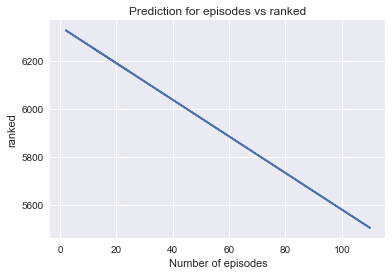

Predictor variable: ranked
r-squared value with ranked: 0.001130239123015242
regression slope with ranked: -7.614598322456281

Spearman correlation: -0.11597774559924326


In [41]:
anime_metrics=["score", "members", "popularity", "ranked"]

#Loop graphs and stats for anime metrics
for metric in anime_metrics:
    anime_linmodel = LinearRegression().fit(anime_epdata[["episodes"]], anime_epdata[metric])
    predictions = anime_linmodel.predict(anime_epdata[["episodes"]])
    plt.plot(anime_epdata["episodes"], predictions)
    plt.title("Prediction for episodes vs {}".format(metric))
    plt.xlabel('Number of episodes')
    plt.ylabel('{}'.format(metric))
    plt.show()
    print("Predictor variable: {}".format(metric))
    print("r-squared value with {}: {}".format(metric, anime_linmodel.score(anime_epdata[["episodes"]], anime_epdata[metric])))
    print("regression slope with {}: {}".format(metric, anime_linmodel.coef_[0]))
    spearman = episodes.corr(anime_epdata[metric], method = 'spearman')
    print("\nSpearman correlation: {}".format(spearman))

Looking at the regression slopes, the slopes for popularity and members is a little unintuitive since it suggests that as the number of anime episodes goes up by 1, the number of members who have the anime listed go down by 100, suggesting that the numerical value of popularity would go up (meaning lower popularity). However, the regression slope is positive. The regression slopes for score and rank make some sense in that when the score increases, the numerical value of rank decreases (better ranked).

There is very low spearman correlation (very close to 0.0) between episodes and all of the metrics which suggests there is very little to no linear relationship. 

The r-squared value for all these metrics are very low and close to 0.0. In this regression model, it means that the data points for each metric do not fit very well with the line of best fit. This suggests that any variation in the score, rank, popularity, and members of the anime cannot be reliably attributed to the number of episodes. 

#### Multilinear regression

Because the linear regression did not adequately describe the relationship between the metrics and number of episodes, we tried using a multilinear regression to control for see if using the metrics, we can predict the ideal number of episodes for an anime. 

In [42]:
#Multilinear regression
multi_episodes_model = LinearRegression().fit(anime_epdata[["popularity", "ranked", "score","members"]], anime_epdata["episodes"])
multi_predictions = multi_episodes_model.predict(anime_epdata[["popularity", "ranked", "score","members"]])
print("coefficient for popularity: {}".format(multi_episodes_model.coef_[0]))
print("coefficient for ranked: {}".format(multi_episodes_model.coef_[1]))
print("coefficient for score: {}".format(multi_episodes_model.coef_[2]))
print("coefficient for members: {}".format(multi_episodes_model.coef_[3]))
print("r-squared value: {}".format(multi_episodes_model.score(anime_epdata[["popularity", "ranked", "score","members"]], anime_epdata["episodes"])))

coefficient for popularity: 0.0015775959896253417
coefficient for ranked: -0.0008671705668739163
coefficient for score: 3.794451895106062
coefficient for members: 2.0544560900726137e-06
r-squared value: 0.06874451813721594


Looking at the coefficients, it seems that score and members played a much bigger role in determining number of episodes while ranked and popularity didn't (which might be because they are discrete ordinal values). 

From this regression we see that the r-squared value is still very small so the datapoints are not a close fit with the line of best fit. 

#### Logistic regression

We also tried doing a logistic regression because score is also categorical data and we could split scores of anime between above average and below average.

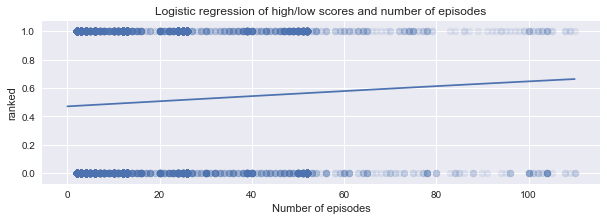

In [43]:
def logit(x):
    return np.exp(x) / (np.exp(x) + 1)

def above_mean(x):
    if x > 6.62:
        return 1
    else:
        return 0
    
def below_mean(x):
    if x < 6.62:
        return 1
    else:
        return 0
    
anime_epdata["high_score"] = score.map(above_mean)
anime_epdata["low_score"] = score.map(below_mean)

model = LogisticRegression(solver="lbfgs").fit(anime_epdata[["episodes"]], anime_epdata["high_score"])

model.coef_, model.intercept_

x_values = np.linspace(0, 110, 100)
    
plt.figure(figsize=(10,3))
plt.scatter(episodes, anime_epdata["high_score"], alpha=0.1)
plt.title("Logistic regression of high/low scores and number of episodes".format(metric))
plt.xlabel('Number of episodes')
plt.ylabel('{}'.format(metric))
plt.plot(x_values, logit(x_values * model.coef_[0,0] + model.intercept_[0]))
plt.show()

In [44]:
anime_train, anime_test = train_test_split(anime_epdata, test_size = 0.2, random_state = 15)
model = LogisticRegression(solver="lbfgs").fit(anime_train[["episodes"]],anime_train["high_score"])
print("Regression coefficient of episodes: {:.7f}".format(model.coef_[0][0]))

Regression coefficient of episodes: 0.0084900


Given that we have a regression coefficient of 0.00849, if we take the $e^(0.00849)$, we get that the odds of the the anime having a high score as an outcome are 1.01 times the odds of getting a low score as an outcome. This shows that the any episode of anime is just as likely to get a high or low score.

In [45]:
n_correct = sum(anime_test["high_score"] == model.predict(anime_test[["episodes"]]))
n_total = len(anime_test)
print("prediction accuracy: {:.1f}".format(100 * (n_correct / n_total)))
n_correct = sum(anime_train["high_score"] == model.predict(anime_train[["episodes"]]))
n_total = len(anime_train)
print("\nprediction accuracy: {:.1f}".format(100 * (n_correct / n_total)))

prediction accuracy: 50.6

prediction accuracy: 53.8


This prediction accuracy matches fairly accurately with the logistic regression model above in that the odds are almost 1:1 of getting a high or low score based on the number of episodes. As with the result above, number of episodes is not a reliable predictor for score. 

# Evaluation of Significance

___ 

## Differences in Genre Preference by Gender

**Hypotheses**: 

*Null hypothesis*: There are no gender differences in genre preference. The genre counts for male favorites _will be equal_ to the genre counts for female favorites. 

*Alternative hypothesis*: There is a gender difference in genre preference. The genre counts for male favorites _will not be equal_ to genre counts for female favorites. 

#### Welch's t test 
To determine whether the observed difference between males v. females is significant, we would need to perform a statistical test. In the dataset, there is an imbalance in sample size as there are approximately 2 times more males than females. Since the variance is unequal, we opted to use Welch's t-test to calculate the p-value. We have defined our alpha to be 0.05. 

In [46]:
pval = stats.ttest_ind(merged['count_m'], merged['count_f'], equal_var = False)[1]
print('p-value: {}'.format(pval))
print("p-value statistically significant? {}".format(float(pval) < 0.05))

p-value: 0.0011185527903480163
p-value statistically significant? True


The t test produced a p-value of approximately 0.001. This is less than the alpha = 0.05, which suggests that the observed gender differences are significant since there is a very low chance that the observed result is due to random chance. Therefore, we reject the null hypothesis, and conclude that there is in fact a gender difference in genre preference. 

## Significance of relationship in sample of anime data between score and episodes

#### Hypotheses
*Null hypothesis*: The regression coefficient of the logistic regression model is not significant.

*Alternative hypothesis*: The regression coefficient of the logistic regression model is significant.

We did a statistical test to check the significance of the regression coefficient of a logistic regression. 

In [47]:
number_stat = 0
for x in range(len(anime_epdata["high_score"])):
    anime_epdata["high_score"] = np.random.permutation(anime_epdata["high_score"].values)
    anime_train, anime_test = train_test_split(anime_epdata, test_size = 0.2, random_state = 15)
    model = LogisticRegression(solver="lbfgs").fit(anime_train[["episodes"]],anime_train["high_score"])
    if abs(model.coef_[0][0]) >  0.0084900:
        number_stat += 1
        
proportion = number_stat/len(anime_epdata["high_score"])
print("p-value: {}".format(proportion))
print("p-value statistically significant? {}".format(float(proportion) < 0.05))

p-value: 0.0
p-value statistically significant? True


Because the statistical test showed that the p-value is 0.0, which is less than our chosen alpha=0.05, this tells us to reject the ull hypothesis and that our regression coefficient from the model we got with the real data is significant and not likely due to random chance.

# Interpretations 
____ 

### _1. Are there gender differences in genre preference? Do they play into stereotypes?_
Our analyses revealed that there is a significant gender difference in genre preference (p = 0.001). 

We found that gender differences in genre preference does generally play into stereotypes. Specifically, males are more likely to prefer anime that contain themes such as action, adventure, sci-fi, military, and super power. Meanwhile, females were more likely to prefer anime that contain themes such as romance, fantasy, magic, and comedy. Surprisingly, females were more likely than males to list animes with themes such as horror, sports, and shounen (a genre of anime that caters to young teen males). Therefore, while we have found that there are times when genre preferences do play into gender stereotypes (ex: males prefer action, females prefer romance), we cannot make a conclusive statement since what genre is stereotypically male or female is up for debate. 


### _2. Which anime genres are most favorited? Are anime studios effectively catering to their viewers?_
From the graphic distribution of anime genres, we can see that a majority of animes have the comedy, action, fantasy, and adventure tags. When looking at the graphic distribution of most frequent genre tags in reported male v. female favorites, we see a similar distribution for both genders where comedy and action are the most frequent genre tags in reported favorites. However, shounen and drama genre tags frequencies in favorites are greater than the fantasy and adventure tags. 

In other words, anime studios are creating more animes with fantasy and adventure themes than shounen and drama themes, but anime viewers actually prefer shounen and drama themes more. This discrepancy could indicate that anime studios would better cater to their female and male audiences by creating more anime that incorporate shounen and drama themes. 

### 3. Does number of episodes influence which animes are the top rated animes? 
From our analyses, we found that animes with fewer episodes tend to score about the same as anime with more episodes. There is a lack of significance in the relationship between number of episodes and the viewership and popularity/satisfaction of the anime. When looking at the linear, multilinear, and logistic regression of these relationships, the r^2 value and regression coeeficient are too close to zero to fit the predicted line of best fit.

This means that viewers aren't influenced by the number of episodes. In other words, long animes (whether due to the studio's budget or success of the anime) neither deter nor attract viewers to watch and give good ratings. It also shows that despite many anime being limited to around 12 or 24 episodes, this does not discourage viewers from picking up a shorter anime from a longer one. The current system of animes being released per season is inconsequential.

# Conclusion
___

In Japan, the anime industry accounts for a significant portion of their economy and culture, and the viewerbase is rapidly expanding overseas. In order for the industry to continue to thrive, it's essential that anime studios understand their customer preferences so that they can better market their anime to their intended viewers. From our analyses, we found there is a lack of significant correlation between number of episodes and viewership and popularity/ranking. When looking at gender differences, we found that there was a significant difference in female v. male preferences for genres such that males were more likely to prefer genres such as action and adventure, whereas females were more likely to prefer romance and comedy. Across both genders, however, more anime with shounen and drama themes are reported to be viewer favorites. 

Given our analyses, it would be wise for anime studios to consider their customer base when deciding what kind of anime to make. However, quantitative characteristics of the anime should not be a major concern so it is recommended for studios to release within their production time and budget. If a studio wishes to boost their score and viewership, they should look more towards other characteristics.

# Limitations

____ 
Although we had a vast array of data available to us, below are some limitations we faced in our analyses.

Dataset limitations: 
- The anime_data dataset was missing some anime titles, which was observed when no anime data could be found for anime of a certain anime uid. These anime were dropped from our analyses. 
- The user profiles dataset contained birth years, but the outliers in birth years demonstrate that some user data might have been fabricated. This puts the validity of the data into question since the birth years in the dataset might not have been the users' actual birth years.
- Over 500 anime that are ongoing or have end dates were missing episodes in the dataset despite having a set number of episodes on MAL. This may have been an error in the initial collection of data. These were removed which took out the data for these set of animes.
- Because movies and specials were removed, the data for those ranked and popularity were also removed, so that may created gaps in the analysis since rank and popularity are ordinal data.
- Not all OVAs, specials, and movies were removed after manually checking on MAL using a sample. For example, one observation was denoted to have 13 episodes on MAL despite being a movie. Furthermore, some specials and OVAs have more than 1 episode, like 2 episodes. These observations were still included as "TV anime", which may have skewed some results.
- MAL lists new seasons as a entirely new anime, thus if a certain animation was successful and got a second season, it would be considered a new anime. This means that for some animes, we won't be able to tell whether or not it got a continuation because of its popularity or ranking since it will be treated as a new anime. 

Analyses limitations: 
- Users identified themselves as female, male, or non-binary. While doing analysis on gender-based differences in genre preference, we ommitted looking at non-binary users because they were an extremely small fraction of the user population, and we were primarily interested in male vs. female differences. Thus, our analysis does not cover gender preferences for non-binary users. 
- Each anime has multiple genre tags (ex: an anime can simultaneously be action, adventure, romance, comedy, mystery), thus making it difficult for us to categorize an anime as one specific genre. The existence of these mulitple tags makes it impossible for us to determine whether an anime is predominantly one genre over another.
- Popularity and rankare both ordinal/categorical data so the linear regression model and multilinear regression model may not have been the best option. The data is not a quantative measure such that one could say an anime ranked at 2 is two times better than an anime ranked at 4. While these could be considered categorial data, because there is nearly no limit to the ranking and popularity (dependent on the max anime of animes existing) unlike score, so it would be difficult to get tangible plots from it. But because the anime's rank is dependent on its score, we were able to indirectly analyze the rank of the anime.

# Acknowledgements 

___ 

We would like to thank Kaggle for being a platform where data scientists can freely explore datasets. The availability of Stack Overflow questions and answers online have helped tremendously in debugging and looking at figuring out new ways to clean and preserve our datasets. We would also like to thank Professor Mimno and the TAs of INFO2950 for teaching us data science essentials and reviewing our work. 

# Appendix 
___ 
Notebook link: https://github.com/michelleyang0606/info2950team/blob/master/Appendix.ipynb